# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Load Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Load data
data = pd.read_csv('/Users/dehilinesma/Downloads/paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Your code here
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### What is the distribution of the outcome? 

<AxesSubplot:>

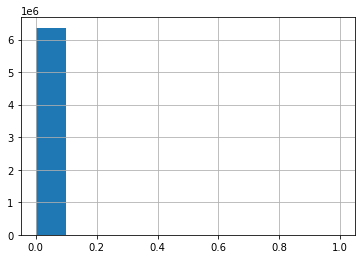

In [5]:
# Your response here
data['isFlaggedFraud'].hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

KeyError: "['oldbalanceDest' 'oldbalanceDest' 'oldbalanceOrg'] not found in axis"

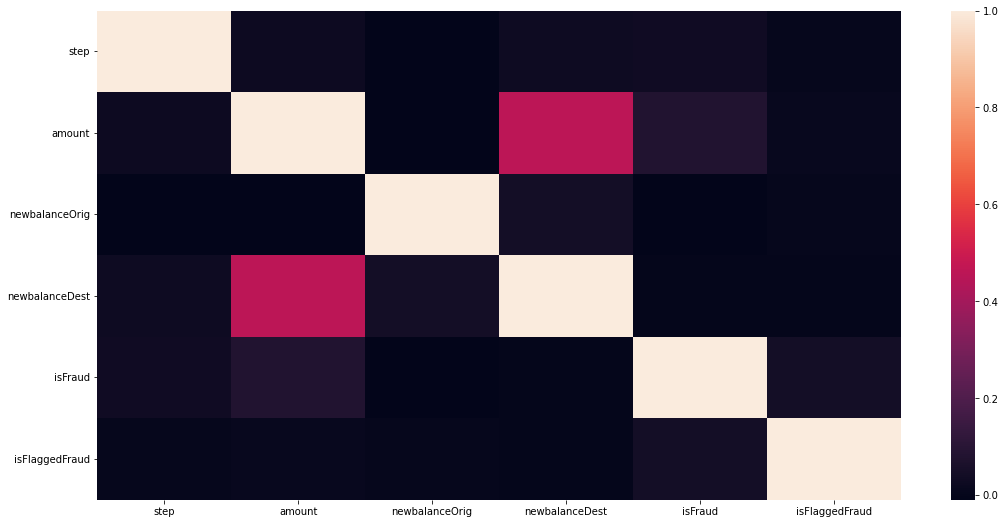

In [18]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr())
data.drop(['oldbalanceDest','oldbalanceDest','oldbalanceOrg'], axis=1, inplace=True)

<AxesSubplot:>

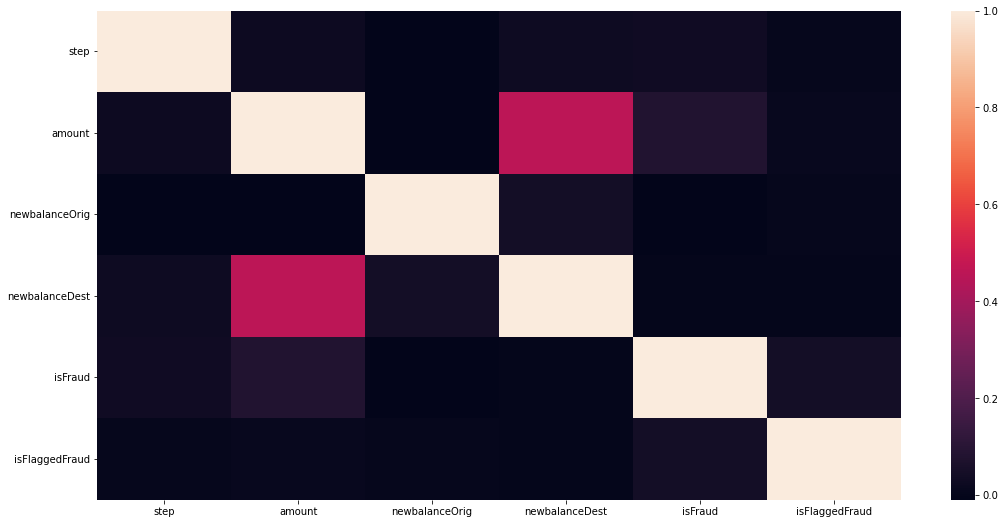

In [17]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr())

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
newbalanceOrig    0
nameDest          0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
start_datetime =  datetime.datetime(2020, 2, 17) 
data['datetime'] = data.apply(lambda x: start_datetime + datetime.timedelta(hours=x['step']), axis=1)

In [11]:
data.dtypes

step                       int64
type                      object
amount                   float64
nameOrig                  object
newbalanceOrig           float64
nameDest                  object
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
dtype: object

In [12]:
data1 = pd.get_dummies(paysim['type'])
df = pd.concat([data, data1], axis=1)

In [13]:
df.dtypes

step                       int64
type                      object
amount                   float64
nameOrig                  object
newbalanceOrig           float64
nameDest                  object
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
CASH_IN                    uint8
CASH_OUT                   uint8
DEBIT                      uint8
PAYMENT                    uint8
TRANSFER                   uint8
dtype: object

In [14]:
df.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)

<AxesSubplot:>

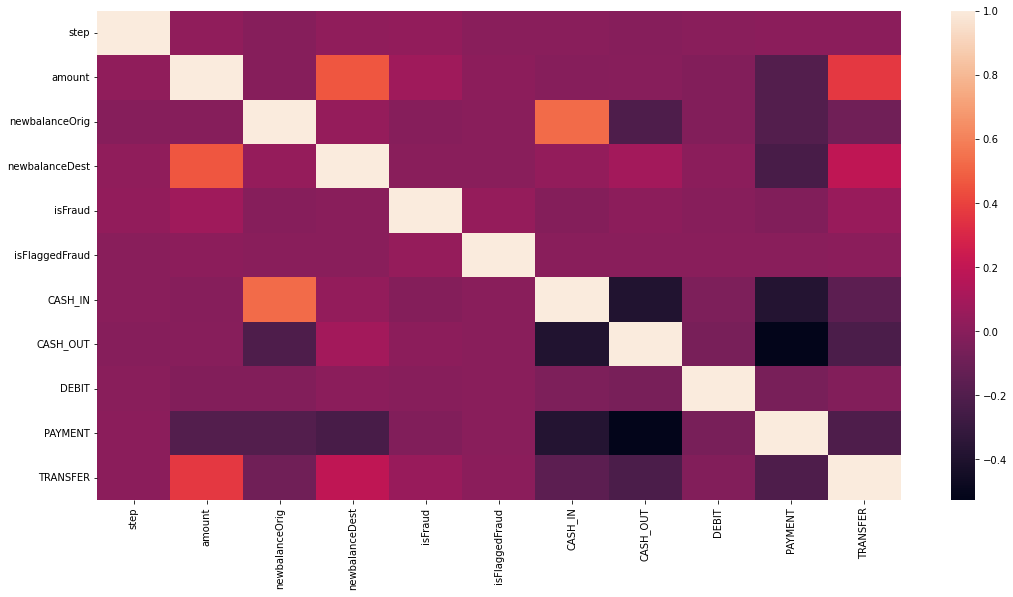

In [16]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr())

### Run a logisitc regression classifier and evaluate its accuracy.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [22]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [25]:
majo = df[df['isFraud'] == 0]
mino = df[df['isFraud'] == 1]
 
# Downsample majority class
majority = resample(majo, replace=False, n_samples=len(mino))

# Combine minority class with downsampled majority class
df1 = pd.concat([majority, mino])

df1['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [28]:
# Your code here
y = df1['isFraud']
X = df1.drop(['isFraud','datetime'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13140, 10) (3286, 10) (13140,) (3286,)


In [29]:
# Create and train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Make a prediction
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

67.65063907486305

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
print('precision: ', precision_score(y_test,y_pred))
print('recall:    ', recall_score(y_test, y_pred))
print('f1_score:  ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

precision:  0.6244268445185494
recall:     0.9024096385542169
f1_score:   0.7381128356738113
[[ 725  901]
 [ 162 1498]]


### Now pick a model of your choice and evaluate its accuracy.

In [33]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# Make a prediction
knn_predict = knn.predict(X_test)

In [35]:
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy_percentage = 100 * knn_accuracy
knn_accuracy_percentage

81.61898965307365

### Which model worked better and how do you know?

In [36]:
# Your response here
##KNeighborsClassifier